In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/creditcard.csv')
print(df)

            Time         V1         V2        V3  ...       V27       V28  Amount  Class
0            0.0  -1.359807  -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1            0.0   1.191857   0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4            2.0  -1.158233   0.877737  1.548718  ...  0.219422  0.215153   69.99      0
...          ...        ...        ...       ...  ...       ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785 -9.834783  ...  0.943651  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  2.035030  ...  0.068472 -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254 -3.249640  ...  0.004455 -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  0.702510  ...  0.108821  0.104533   10.00      0
284806  172792.0  -0.

In [9]:
x = df.drop('Class', axis=1)
y = df['Class']

In [10]:
print(x)
print(y)

            Time         V1         V2        V3  ...       V26       V27       V28  Amount
0            0.0  -1.359807  -0.072781  2.536347  ... -0.189115  0.133558 -0.021053  149.62
1            0.0   1.191857   0.266151  0.166480  ...  0.125895 -0.008983  0.014724    2.69
2            1.0  -1.358354  -1.340163  1.773209  ... -0.139097 -0.055353 -0.059752  378.66
3            1.0  -0.966272  -0.185226  1.792993  ... -0.221929  0.062723  0.061458  123.50
4            2.0  -1.158233   0.877737  1.548718  ...  0.502292  0.219422  0.215153   69.99
...          ...        ...        ...       ...  ...       ...       ...       ...     ...
284802  172786.0 -11.881118  10.071785 -9.834783  ...  0.250034  0.943651  0.823731    0.77
284803  172787.0  -0.732789  -0.055080  2.035030  ... -0.395255  0.068472 -0.053527   24.79
284804  172788.0   1.919565  -0.301254 -3.249640  ... -0.087371  0.004455 -0.026561   67.88
284805  172788.0  -0.240440   0.530483  0.702510  ...  0.546668  0.108821  0.104

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(y_train)

            Time        V1        V2        V3  ...       V26       V27       V28  Amount
223361  143352.0  1.955041 -0.380783 -0.315013  ... -0.216780  0.045168 -0.047145    9.99
165061  117173.0 -0.400975 -0.626943  1.555339  ...  0.361924 -0.370469 -0.144792   45.90
238186  149565.0  0.072509  0.820566 -0.561351  ...  0.119690  0.206395  0.070288   11.99
150562   93670.0 -0.535045  1.014587  1.750679  ... -0.181038 -0.093013 -0.064931  117.44
138452   82655.0 -4.026938  1.897371 -0.429786  ...  0.245335  0.286904 -0.322672   25.76
...          ...       ...       ...       ...  ...       ...       ...       ...     ...
119879   75618.0  1.173488  0.100792  0.490512  ...  0.109235 -0.020922  0.003967    1.98
259178  159000.0 -0.775981  0.144023 -1.142399  ... -0.770941  0.066006  0.137056   89.23
131932   79795.0 -0.146609  0.992946  1.524591  ... -0.398467 -0.121139 -0.196195    3.94
146867   87931.0 -2.948638  2.354849 -2.521201  ...  0.426309  0.496912  0.335822    1.00
121958   7

In [26]:
scaler = StandardScaler()
xt_scaled = scaler.fit_transform(x_train)
xte_scaled = scaler.transform(x_test)
print(xt_scaled)

[[ 1.02255459  0.99785119 -0.22962626 ...  0.11248883 -0.14374055
  -0.30788875]
 [ 0.47128275 -0.205221   -0.37821992 ... -0.92189789 -0.43984143
  -0.1670264 ]
 [ 1.15338663  0.03655821  0.49556347 ...  0.51372993  0.21235767
  -0.30004345]
 ...
 [-0.31581527 -0.07533181  0.59962034 ... -0.3013968  -0.59571596
  -0.33162078]
 [-0.1444891  -1.50615534  1.42172842 ...  1.23673372  1.01755287
  -0.34315338]
 [-0.38770656  0.62923844 -0.47354037 ...  0.00310728  0.11623211
   0.0961834 ]]


In [27]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier()
mdl.fit(xt_scaled, y_train)
y_pred = mdl.predict(xte_scaled)
print(y_pred)

[1 0 0 ... 0 0 0]


In [29]:
mse = accuracy_score(y_test, y_pred)
print(f'Accuracy_score={mse:.2f}')

Accuracy_score=1.00


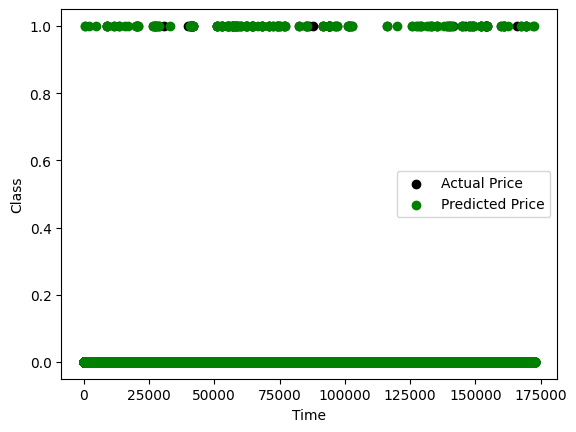

In [32]:
plt.scatter(x_test['Time'], y_test, color = 'black', label= 'Actual Price')
plt.scatter(x_test['Time'], y_pred, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Class')
plt.legend()
plt.show()